In [2]:
!pip install wordcloud

  Using cached wordcloud-1.9.3-cp38-cp38-win_amd64.whl (300 kB)


In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import zipfile
import os 
import pandas as pd

# Path to the ZIP file
zip_file_path = "tweets_v8.csv.zip"

# Directory to extract the files
extracted_dir = "extracted_tweets"

# Create a directory to extract the files
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Find the CSV file containing tweets
csv_file_path = None
for root, dirs, files in os.walk(extracted_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_file_path = os.path.join(root, file)
            break

# Read the CSV file into a DataFrame
if csv_file_path:
    data = pd.read_csv(csv_file_path)
    print("DataFrame loaded successfully.")
    # Now you can work with the DataFrame 'df'
else:
    print("No CSV file containing tweets found in the extracted directory.")


DataFrame loaded successfully.


In [5]:
print(data.isnull().sum())

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64


In [6]:
data = data.drop(columns="user_description", axis=1)
data = data.dropna()

In [8]:
data.shape

(56149, 11)

In [9]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)


[nltk_data] Downloading package stopwords to C:\Users\'Dare
[nltk_data]     Badejo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


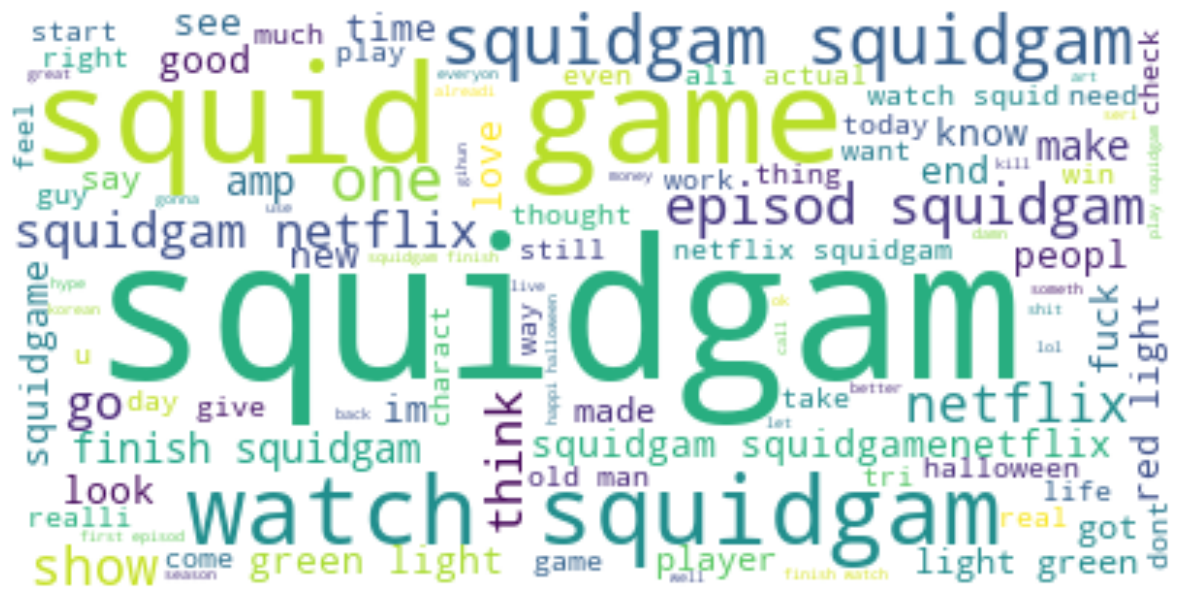

In [10]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\'Dare
[nltk_data]     Badejo\AppData\Roaming\nltk_data...


                                                text  Positive  Negative  \
3  blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4  two first game player kill mask guy  bloodi ni...     0.000     0.461   
5  thggo explod  marketcap soonth world first mob...     0.000     0.000   
7  pleas vote daili poll thank 😊do think donni va...     0.152     0.000   
9  discov english audio  episod squid game korean...     0.000     0.000   

   Neutral  
3    0.581  
4    0.539  
5    1.000  
7    0.848  
9    1.000  


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)